#### 神经网络回归

**数据生成**
+ x：在区间$[-3,3]$之间均匀分布
+ y_pure：真实预测数据
$$ y = \sin(4x)+x $$
+ y：添加噪声数据，噪声分布$N(0,0.25)$
$$ y = \sin(4x)+x+\delta,\qquad \delta \sim N(0,0.25) $$

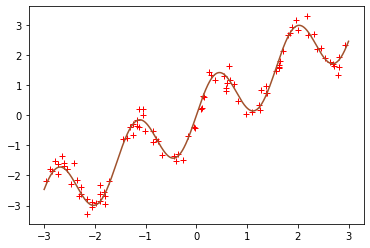

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(42)
x = rnd.uniform(-3,3,size=100)
y_pure = np.sin(4*x) + x
y = y_pure + rnd.normal(size=len(x))/4

plt.plot(x,y,'r+')

xx = np.linspace(-3, 3, 1000).reshape(-1, 1)
yy = np.sin(4*xx) + xx
plt.plot(xx,yy,'sienna')

plt.show()

**学习神经网络回归器**

+ 网络结构
    - 输入层：1个神经元
    - 隐含层：20个神经元，对数Sigmoid激活函数
    - 输出层：1个神经元
+ 学习参数
    - 学习算法：lbfgs
    - 最大迭代次数：20000
    - 权值衰减系数：0.01
+ 显示
    - <font color=red>红色</font>的'+'为训练数据
    - <font color=sienna>浅棕色</font>曲线为真实函数
    - <font color=blue>蓝色</font>曲线为神经网络学习到的函数

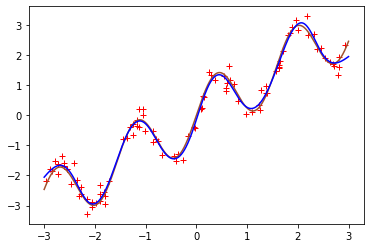

In [2]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor( hidden_layer_sizes=(20), activation='logistic',solver='lbfgs',alpha=0.01,max_iter=20000)
mlp.fit(x.reshape(-1,1),y)

plt.plot(x,y,'r+')
plt.plot(xx,yy,'sienna')

predict_yy = mlp.predict(xx)
plt.plot(xx, predict_yy, 'b')

plt.show()

In [3]:
print("w of hidden layer:", mlp.coefs_[0])
print(chr(920)," of hidden layer:", mlp.intercepts_[0])

print("\nw of output layer:", mlp.coefs_[1])
print(chr(920)," of hidden layer:", mlp.intercepts_[1])

w of hidden layer: [[ 5.36512256  0.05741376  0.98096383 -0.52407557  4.98002818  3.20123194
  -0.10920892  1.08862728  0.6746846   0.56035099  5.89352399 -4.99459569
  -0.50262946  1.19921538 -4.48743666  4.10944826  0.87466719  5.79784142
   0.92159262 -0.51465186]]
Θ  of hidden layer: [ -0.23403484   2.8048316   -2.59212236   0.47014577  -3.66382535
   9.65469834  -7.09765657  -2.95579333   1.25034749   0.77374885
 -13.6967735   -4.05494131   0.94888203  -3.46495143  -7.04833594
  -6.80272768  -2.12155466  13.52514199  -2.35539945  -0.92551011]

w of output layer: [[ 3.89184546]
 [ 0.17377436]
 [ 1.14323943]
 [-0.69338065]
 [-3.71573086]
 [ 2.4952867 ]
 [-0.05712909]
 [ 1.16453771]
 [ 0.9099703 ]
 [ 0.84356003]
 [-4.01276827]
 [ 3.51942311]
 [-0.67221154]
 [ 1.21372066]
 [-4.26439639]
 [ 3.63995496]
 [ 1.04382612]
 [-3.49572381]
 [ 1.09005017]
 [-0.70910703]]
Θ  of hidden layer: [-1.54780843]
